In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/vimu/Documents/Data Science/SDS/Github/TimeSeriesAnalysis/Data/Energy_consumption.csv',index_col= "Timestamp",parse_dates=True)

In [3]:
df.columns

Index(['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage',
       'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

In [4]:
columns_to_remove = [
    'Humidity', 'SquareFootage', 
    'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday'
]

df_cleaned = df.drop(columns=columns_to_remove, errors='ignore')

In [5]:
df_cleaned.columns

Index(['Temperature', 'Occupancy', 'EnergyConsumption'], dtype='object')

In [7]:
df_cleaned.describe

<bound method NDFrame.describe of                      Temperature  Occupancy  EnergyConsumption
Timestamp                                                     
2022-01-01 00:00:00    25.139433          5          75.364373
2022-01-01 01:00:00    27.731651          1          83.401855
2022-01-01 02:00:00    28.704277          2          78.270888
2022-01-01 03:00:00    20.080469          1          56.519850
2022-01-01 04:00:00    23.097359          9          70.811732
...                          ...        ...                ...
2022-02-11 11:00:00    28.619382          5          82.306692
2022-02-11 12:00:00    23.836647          4          66.577320
2022-02-11 13:00:00    23.005340          6          72.753471
2022-02-11 14:00:00    25.138365          3          76.950389
2022-02-11 15:00:00    23.051165          6          71.545311

[1000 rows x 3 columns]>

In [9]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Start with your cleaned DataFrame
df = df_cleaned.copy()

# Step 2: Create lag features (10 lags each)
for lag in range(1, 11):
    df[f'EC_lag_{lag}'] = df['EnergyConsumption'].shift(lag)
    df[f'Temp_lag_{lag}'] = df['Temperature'].shift(lag)
    df[f'Occ_lag_{lag}'] = df['Occupancy'].shift(lag)

# Step 3: Drop rows with NaNs (from shifting)
df.dropna(inplace=True)

# Step 4: Define X and y
X = df.drop(['EnergyConsumption'], axis=1)
y = df['EnergyConsumption']

# Step 5: Time-based 80/20 split
split = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# Step 6: Train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 6.17


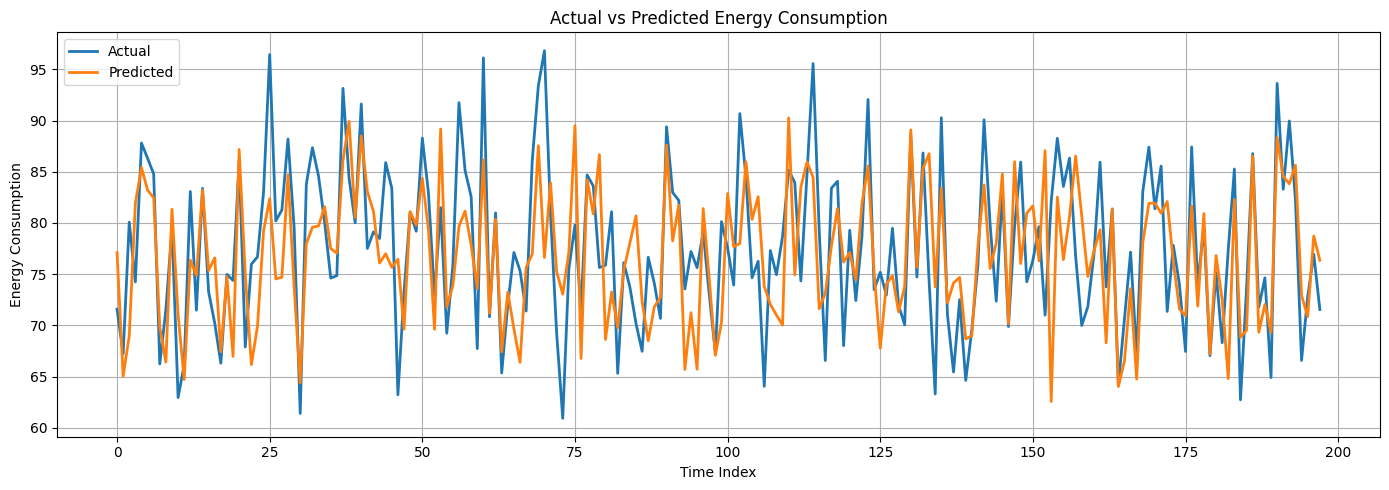

In [10]:
import matplotlib.pyplot as plt

# Make sure y_test and y_pred are aligned (e.g., pandas Series or same index length)
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linewidth=2)
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Time Index')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()